**Linking Google Colab to Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


**Necessary Imports**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Datasets**

In [24]:
customers = pd.read_csv("/content/drive/MyDrive/Zeotap/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Zeotap/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Zeotap/Transactions.csv")

**EDA**

In [25]:
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

In [26]:
print("Missing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


**Signup Trends Over the Years**

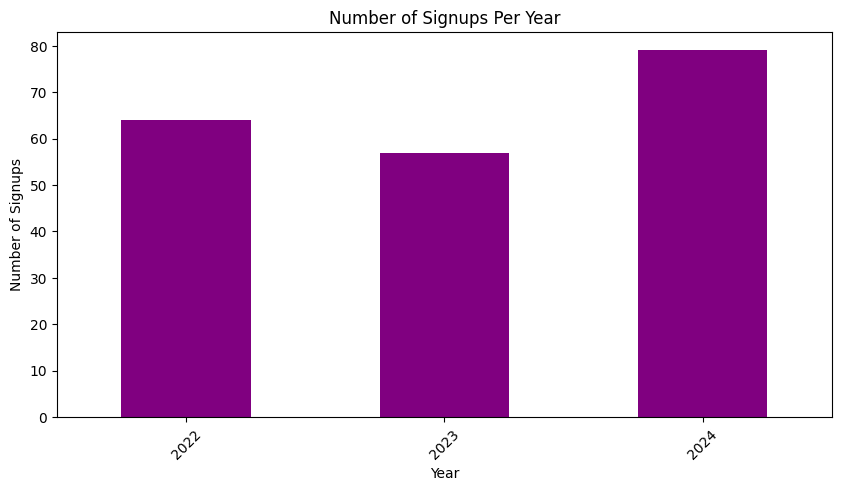

In [33]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trend = customers['SignupYear'].value_counts().sort_index()

plt.figure(figsize=(10,5))
signup_trend.plot(kind='bar', color='purple')
plt.title('Number of Signups Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

**Customer Distribution Over Region**

<ipython-input-27-ceeb1ad77346>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


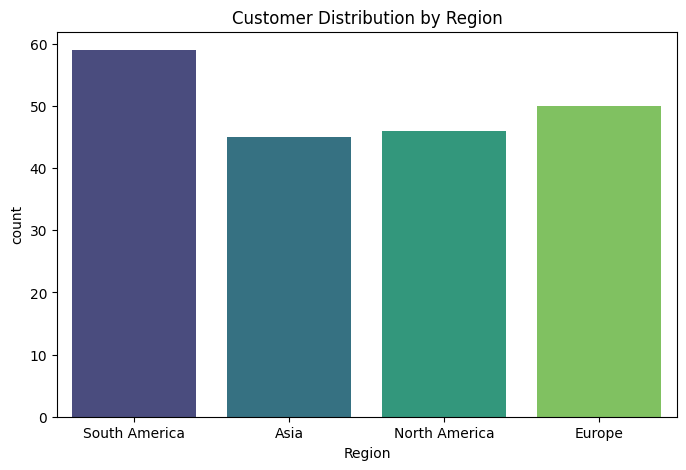

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.show()

**Product Category Popularity**

<ipython-input-28-85bccfbc6ef1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='pastel')


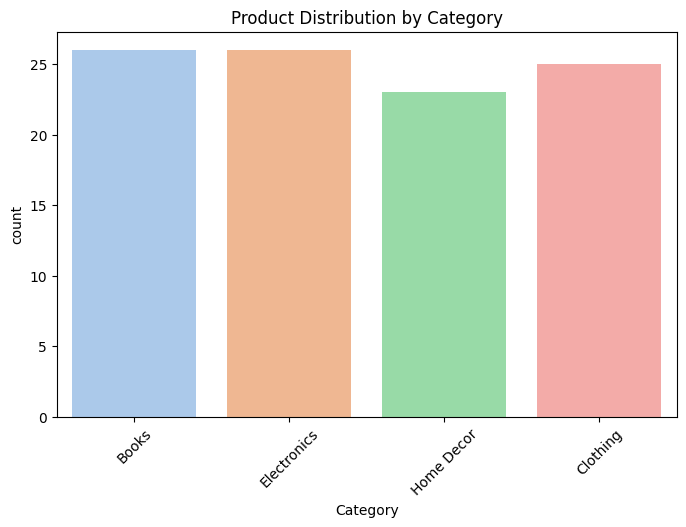

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=products, x='Category', palette='pastel')
plt.xticks(rotation=45)
plt.title('Product Distribution by Category')
plt.show()

**Revenue Trends Over Time**

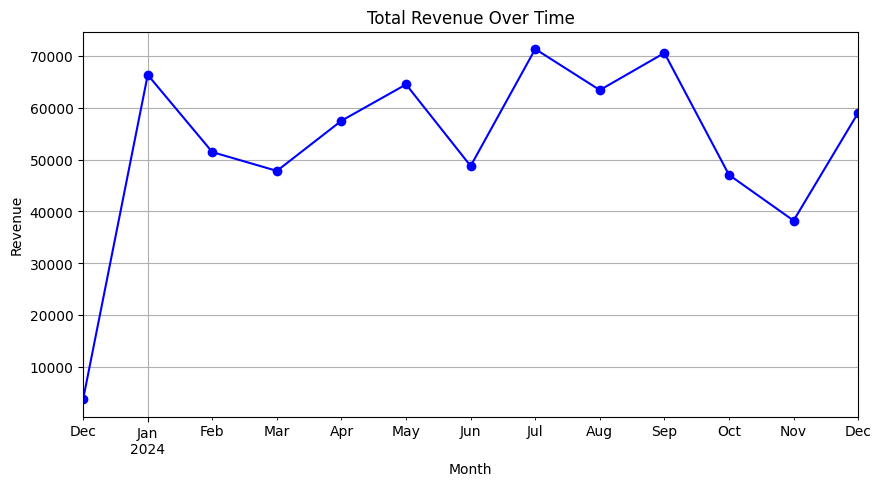

In [29]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

total_revenue = transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10,5))
total_revenue.plot(kind='line', marker='o', color='b')
plt.title('Total Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()
plt.show()

**Top 10 Most Purchased Products.**

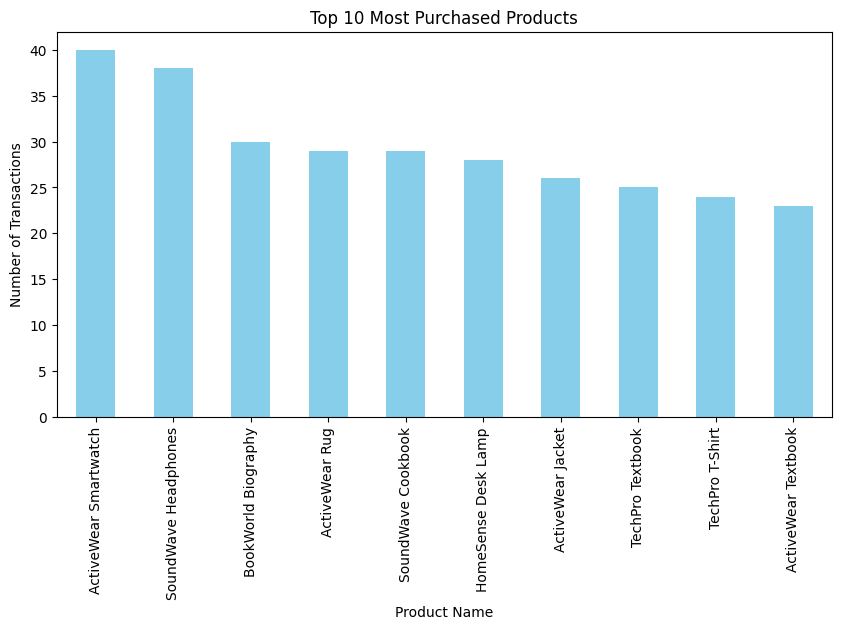

In [30]:
transactions = transactions.merge(products, on='ProductID', how='left')
top_products = transactions['ProductName'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

**Customer Spending Patterns**

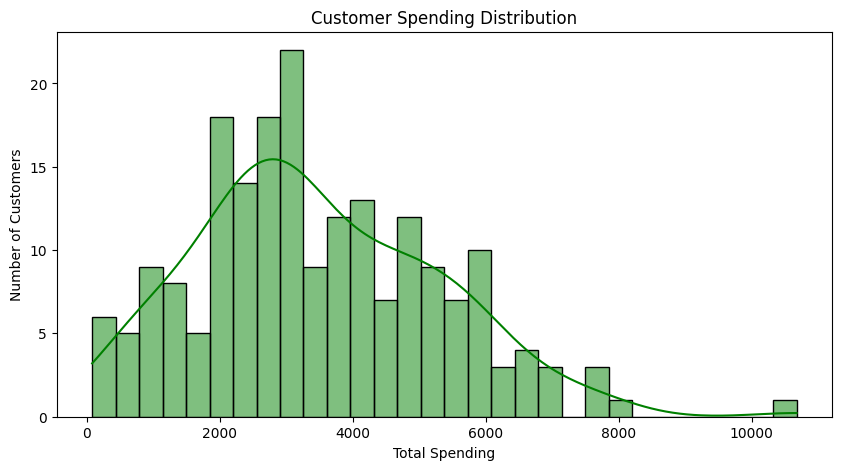

In [11]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum()
plt.figure(figsize=(10,5))
sns.histplot(customer_spending, bins=30, kde=True, color='green')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()

<ipython-input-31-05b3c3e50353>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customer_spending = transactions.groupby('CustomerID').apply(lambda x: x['TotalValue'].sum() / x['Quantity'].sum())


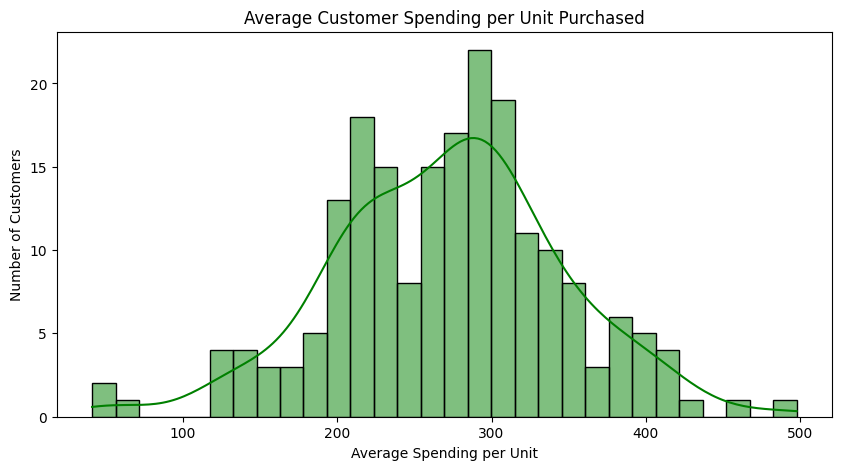

In [31]:
customer_spending = transactions.groupby('CustomerID').apply(lambda x: x['TotalValue'].sum() / x['Quantity'].sum())
plt.figure(figsize=(10,5))
sns.histplot(customer_spending, bins=30, kde=True, color='green')
plt.title('Average Customer Spending per Unit Purchased')
plt.xlabel('Average Spending per Unit')
plt.ylabel('Number of Customers')
plt.show()